<a href="https://colab.research.google.com/github/mrenrique/projects/blob/main/posts/data-preprocessing-with-pandas/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

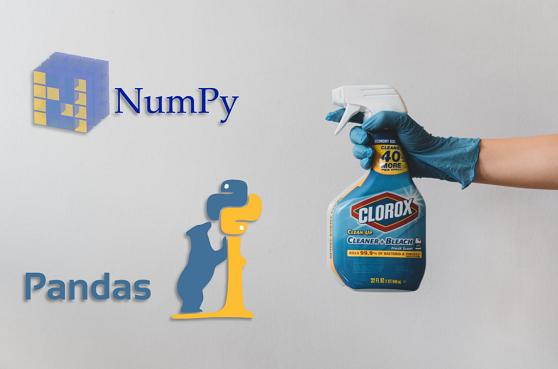

## TL;DR 👀

In a previous project, [I made a Dataset by Scraping the videos details of a Youtube Channel using Selenium and Python](https://mrenrique.github.io/portfolio/web%20scraping/python/data%20science/pandas/selenium/2020/12/27/web-scraping-youtube-channel-selenium.html). This time I'll be showing how to perform many tasks in order to process all the gathered information. The output of this project is a [Clean and ready-to-analyse Dataset](https://github.com/mrenrique/EDA-to-Youtube-Channel-Videos/blob/main/clean_data.csv) containing information of all International Matches of Freestyle organized by Red Bull from 2015 to 2020 (filtered by `internacional` and ` vs ` keywords). Also, here I leave you the [Output Dataset from the previous Web Scraping Project](https://github.com/mrenrique/EDA-to-Youtube-Channel-Videos/blob/main/redbulloficialgallos_videos_details_dec-27-2020.csv), so you can compare them.


But first, let's learn a bit about the International Competition. **Red Bull Batalla de los Gallos** is the Most Recognized **Freestyle Competition in Spanish** that brings together the **16 winning Freestylers** from the competitions organized by Red Bull in each country. After all matches only one of them is crowned as international champion. [Click here to learn more](https://rap.fandom.com/es/wiki/Red_Bull_Batalla_de_los_Gallos)

## Importing Libraries 🧰

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import re

from datetime import datetime

# check Pandas' version
pd.__version__

'1.1.5'

## Importing Dataset 🗃️

In [ ]:
# importing from url
data_url = 'https://raw.githubusercontent.com/mrenrique/EDA-to-Youtube-Channel-Videos/main/redbulloficialgallos_videos_details_dec-27-2020.csv'

# reading dataset with pandas and asigning  to a variable
data = pd.read_csv(data_url)

# show first three rows
data.head(3)

,title,views,upload_date,length,likes,dislikes,url
0,ACZINO vs EXODO LIRICAL - 3er y 4to Puesto | R...,"577,503","Dec 12, 2020",6:16,"14,040",270,https://www.youtube.com/watch?v=Fwda4AWZ6V4
1,EXODO LIRICAL vs RAPDER - Semifinal | Red Bull...,"238,463","Dec 12, 2020",12:30,"8,135",927,https://www.youtube.com/watch?v=wIcz1_7qx-4
2,ACZINO vs SKONE - Semifinal | Red Bull Interna...,"756,352","Dec 12, 2020",10:06,"18,458","1,146",https://www.youtube.com/watch?v=yv8yFhRsWVc


## Learning the Dataset's Properties 💡

Let's take a look at the datafame's properties for a better understanding to know what needs to be done. To do so, we can use the `info()` method which gives us the number of columns, **columns names** and their **data types** all together.

In [ ]:
# Display number of columns, columns names , Non-Null Count and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        95 non-null     object
 1   views        95 non-null     object
 2   upload_date  95 non-null     object
 3   length       95 non-null     object
 4   likes        95 non-null     object
 5   dislikes     95 non-null     object
 6   url          95 non-null     object
dtypes: object(7)
memory usage: 5.3+ KB


 Now that we learn about the dataset in a **general way**, let's also learn in a **detailed way** by showing a random sample of the dataset to give us an idea of what **kind of values** we are dealing with. Let's start by showing a random sample of the dataset.

In [ ]:
# Random sample of 50 % of Dataset
data.sample(frac=0.5).head()

,title,views,upload_date,length,likes,dislikes,url
19,TRUENO vs TITO MC - Octavos | Red Bull Interna...,"2,082,852","Nov 30, 2019",5:51,"43,267","3,996",https://www.youtube.com/watch?v=KJbIAlUdmLw
71,JONY BELTRAN vs CHUTY - Octavos | Red Bull Int...,"13,138,438","Nov 12, 2016",7:09,"182,494","11,726",https://www.youtube.com/watch?v=C2rXItCS8I0
23,JAZE vs SNK - Octavos | Red Bull Internacional...,"1,407,134","Nov 30, 2019",7:06,"28,687",890,https://www.youtube.com/watch?v=gkfOnJI4Byc
52,ARKANO vs. YENKY ONE - 3 y 4 Puesto: Final Int...,"2,093,488","Dec 3, 2017",4:47,"30,378","1,347",https://www.youtube.com/watch?v=VOHgIr6dSZI
60,JONY BELTRAN vs. ARKANO - Cuartos: Final Inter...,"3,352,057","Dec 3, 2017",4:41,"37,794","1,164",https://www.youtube.com/watch?v=wWtcdK7bd4Y


## Data Cleaning 🧼 and Transformation 🔪

There are many tasks involved in **Data Preprocessing** which in turn are grouped into 4 main processes (**Data Integration, Data Cleaning, Data Transformation and Data Reduction**) but depending on the **data** and the **scope of this project** (Exploratory Data Analysis) we'll just need to perform some of them. let's start assuring the Data Quality for further Analysis.

### Renaming Columns Names

Let's first show all Columns Names to check if they required changes.

In [ ]:
# Show all columns
data.columns

Index(['title', 'views', 'upload_date', 'length', 'likes', 'dislikes', 'url'], dtype='object')

As we see, almost all Columns Names are ok except for `upload_date`. Let's change it for `year` Since we only need the year of the date.

In [ ]:
data.rename(columns={'upload_date': 'year'}, inplace=True)

# Verify changes
data.columns

Index(['title', 'views', 'year', 'length', 'likes', 'dislikes', 'url'], dtype='object')

In [ ]:
# see types of all columns and change its type if needed
data.dtypes

title       object
views       object
year        object
length      object
likes       object
dislikes    object
url         object
dtype: object

### Deleting Columns not needed (**First Attempt**)

It's useful to remove some Columns that doesn't contributed to the Analysis Goal. In this case, `url` Column is not necesary.


In [ ]:
# Another way is not using the axis argument but instead asign columns argument
data.drop(columns=['url'], inplace=True)
data.columns

Index(['title', 'views', 'year', 'length', 'likes', 'dislikes'], dtype='object')

### Modifying values by Removing (Additional meaningless data), Adding or Formating them

Now in order to Set the proper Data Type to each Column we need to make sure that all Columns Values are **clean**. Let's see a few rows to know what kind of values the dataset has.

In [ ]:
data.head()

,title,views,year,length,likes,dislikes
0,ACZINO vs EXODO LIRICAL - 3er y 4to Puesto | R...,"577,503","Dec 12, 2020",6:16,"14,040",270
1,EXODO LIRICAL vs RAPDER - Semifinal | Red Bull...,"238,463","Dec 12, 2020",12:30,"8,135",927
2,ACZINO vs SKONE - Semifinal | Red Bull Interna...,"756,352","Dec 12, 2020",10:06,"18,458","1,146"
3,RAPDER vs YARTZI - Cuartos | Red Bull Internac...,"47,082","Dec 12, 2020",6:46,"1,822",206
4,EXODO LIRICAL vs BNET - Cuartos | Red Bull Int...,"685,109","Dec 12, 2020",6:40,"23,202","1,842"


As you can see, there are some Undesired characters among the values of some Columns. So it's necesary to **remove Unnecessary Characteres before doing any conversion task**. Let's start cleaning the `title` Column to keep only the Names of Freestylers

> Important: Be careful, sometimes there are some characteres that seems similar like these ones - and –  but they are completely different and it can take you a while figure out why is not spliting as espected. I also had to add a conditional because the name of a participal has the - in it and it was spliting up incorrectly.

In [ ]:
# Split by multiple different delimiters
pattern = '[-–|:]'

# data['title'] = [re.split(pattern, i)[0].strip() if 'VALLES-T' not in i else i for i in data['title']]
data['title'] = [re.split(pattern, i)[0].strip() if 'VALLES-T' not in i else re.split(' - ', i)[0].strip() for i in data['title']]

data['title'] = [i.replace('.', '').strip() for i in data['title']]

# verify changes
data[data['title'].str.contains('VALLES')].head()

,title,views,year,length,likes,dislikes
10,BNET vs VALLES-T,"1,350,908","Dec 12, 2020",9:08,"49,448","3,012"
18,BNET vs VALLES-T,"16,680,349","Nov 30, 2019",17:12,"282,481","32,957"
20,VALLES-T vs CHANG,"11,477,492","Nov 30, 2019",6:43,"161,561","2,969"
26,VALLES-T vs JOKKER,"3,221,089","Nov 30, 2019",6:21,"48,888","1,155"
31,VALLES-T vs ACZINO,"16,277,039","Nov 30, 2019",13:46,"279,388","9,027"


Lets continue cleaning the Columns `views`, `likes` and `dislikes`, In this case, we'll remove the comma (,) from `views`, `likes` and `dislikes` Columns Values. Also, in the **row 8** (and some others rows) there is the word `Premiered` before the date string. It needs to be removed.

In [ ]:
# List of characters to remove
chars_to_remove = [' ', ',']

# List of column names to clean
cols_to_clean = ['views', 'dislikes', 'likes']

# Loop for each column
for col in cols_to_clean:

    # Replace each character with an empty string
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char,'')

# verify changes
data.head(3)

,title,views,year,length,likes,dislikes
0,ACZINO vs EXODO LIRICAL,577503,"Dec 12, 2020",6:16,14040,270
1,EXODO LIRICAL vs RAPDER,238463,"Dec 12, 2020",12:30,8135,927
2,ACZINO vs SKONE,756352,"Dec 12, 2020",10:06,18458,1146


As we said earlier, we only need the last part of the string for each `upload_date` Column Value.

In [ ]:
data['year'] = [re.split(',', i)[1].strip() for i in data['year']]

# verify changes
data['year'].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: year, dtype: object

### Data Type Convertion
(less memory usage)

Let's check what Data Types the Columns are

In [ ]:
data.dtypes

title       object
views       object
year        object
length      object
likes       object
dislikes    object
dtype: object

Since we already saw the dataset have String, Datetime and Number values, this is not so specific, we need to set the right Data Type to all Columns. Let's first try an Automatic Data Type Conversion Method toy see if this will do the trick.

In [ ]:
# Convert to Best Data Types Automatically
data.convert_dtypes().dtypes

title       string
views       string
year        string
length      string
likes       string
dislikes    string
dtype: object

Since we see the code above it's not quite effective, **we'll need to convert them manually**. Also, from the above code, we see that it's neccesary remove some characteres inside Columns Values, **that's why the automatic method set all columns as a string.**

In [ ]:
data['title'] = data['title'].astype(str)

# List of column names to convert to numberic data
cols_to_modify_dtype = ['views', 'dislikes', 'likes']

for col in cols_to_modify_dtype:
    # Convert col to numeric
    data[col] = pd.to_numeric(data[col])

data['length'] = pd.to_datetime(data['length'], format='%M:%S').dt.time

data['year'] = pd.DatetimeIndex(data['year']).year

# verify changes
data.dtypes

title       object
views        int64
year         int64
length      object
likes        int64
dislikes     int64
dtype: object

Lets print once again a few rows of the dataset to see if changes were applied.

In [ ]:
data.head()

,title,views,year,length,likes,dislikes
0,ACZINO vs EXODO LIRICAL,577503,2020,00:06:16,14040,270
1,EXODO LIRICAL vs RAPDER,238463,2020,00:12:30,8135,927
2,ACZINO vs SKONE,756352,2020,00:10:06,18458,1146
3,RAPDER vs YARTZI,47082,2020,00:06:46,1822,206
4,EXODO LIRICAL vs BNET,685109,2020,00:06:40,23202,1842


### Dealing with Missing Values

First we verify if the dataset have Missing Values.

In [ ]:
# Show Whether the dataset contain any Missing Value
data.isnull().values.any()

False

Since there is not Missing Values, Let's move on to the next task.

### Removing Duplicated Values

In order to identify if there are Duplicated Values, we'll use `duplicated()` method.

In [ ]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = data[data.duplicated()]
if duplicateRowsDF.empty == True:
    print('There arent Duplicated Values. Good to go!')
else:
    print('Duplicate Rows except first occurrence based on all columns are :')
    print(duplicateRowsDF)

There arent Duplicated Values. Good to go!


### Dealing with Inconsistencies Data
(Business Rule | Domain Expertice required)
Modifying | Removing Erroneus Values

Because I'm myself a fan of such Freestyle Competitions, I know that normally there are up to 16 matches every year. Let's verify that.

In [ ]:
data['year'].value_counts()

2018    18
2020    17
2019    16
2017    16
2016    16
2015    12
Name: year, dtype: int64

As we can see there are more than that in the year 2018 and 2020, Lets find out what's going on.

In [ ]:
data[data['year'] == 2018]

,title,views,year,length,likes,dislikes
33,SWITCH vs BNET,1637196,2018,00:07:19,33768,493
34,WOS vs RAPDER Octavos,1831544,2018,00:07:01,33093,5586
35,BNET vs ARKANO,3506340,2018,00:07:17,58063,1371
36,VALLES T vs PEPE GRILLO,10975462,2018,00:07:18,166863,2964
37,NEON vs LETRA,4750022,2018,00:07:36,77815,1101
38,WOS vs LETRA,3875917,2018,00:07:34,72927,5913
39,VALLES T vs BNET,3609190,2018,00:08:09,62295,4511
40,WOS vs ACZINO,39525308,2018,00:19:03,680254,73824
41,VALLES T vs KDT,1858540,2018,00:07:50,33888,877
42,ACZINO vs JAZE,4673494,2018,00:07:53,70535,5986


Rows 49 and 50 are not part of the International Competition' videos, so they need to be removed. Now, let's see the rows of 2020 year

In [ ]:
data[data['year'] == 2020]

,title,views,year,length,likes,dislikes
0,ACZINO vs EXODO LIRICAL,577503,2020,00:06:16,14040,270
1,EXODO LIRICAL vs RAPDER,238463,2020,00:12:30,8135,927
2,ACZINO vs SKONE,756352,2020,00:10:06,18458,1146
3,RAPDER vs YARTZI,47082,2020,00:06:46,1822,206
4,EXODO LIRICAL vs BNET,685109,2020,00:06:40,23202,1842
5,SKONE vs ACERTIJO,179664,2020,00:09:36,5341,4847
6,ACZINO vs NAICEN,158269,2020,00:06:51,5507,1713
7,SKONE vs RAPDER,1651540,2020,00:15:19,64965,3259
8,ELEVN vs YARTZI,56480,2020,00:06:30,2041,131
9,RAPDER vs STICK,122237,2020,00:06:21,4389,2710


The same, Even though the row 16 is a international Competition Video (info), this match was done to have a reserve competitor just in case any of the 16 couldn't make it. But it didn't occur. Now let's remove all rows are not part of the Oficial Matches' Videos.

In [ ]:
# Delete rows with index label
data = data.drop([16, 49 , 50])

### Setting & Modifying the Index Column

Bencause it was necessary to remove some rows (16,49 and 50), the index was changed. Let fix that. Also, I'll asign a name to the Index Column.

In [ ]:
data.reset_index(inplace = True, drop=True)

In [ ]:
data.loc[48:50,:]

,title,views,year,length,likes,dislikes
48,G vs EL TANQUE,253069,2017,00:05:08,3640,424
49,ARKANO vs YENKY ONE,2093488,2017,00:04:47,30378,1347
50,WOS vs ACZINO,23008624,2017,00:07:51,261785,13990


## Exporting the Clean Dataset 💾



Now that we're assure the dataset is clean and contain only the right values. Let's export it to move on to Exporing and Analizing the dataset.

In [ ]:
data.to_csv('clean_data.csv')

Or if you prefer, you can download it to your Computer.

In [ ]:
data.to_csv('clean_data.csv')

from google.colab import files
files.download('clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You're Awesome 😍, you just reached the end of this post. If you have any questions just [drop me a message on my LikedIn](https://www.linkedin.com/in/enriquemosqueira/). Also, any suggestion or kudos would be quite appreciated. Did you find it useful? [Check out my other posts here](https://mrenrique.github.io/blog/), I'm sure you'll find something interesting 💡.

Share this post with your friends/colleagues, and if you are in a good mood, [buy me a cup of coffee ☕](https://www.buymeacoffee.com/enriquemr9X). Nos vemos! 🏃💨